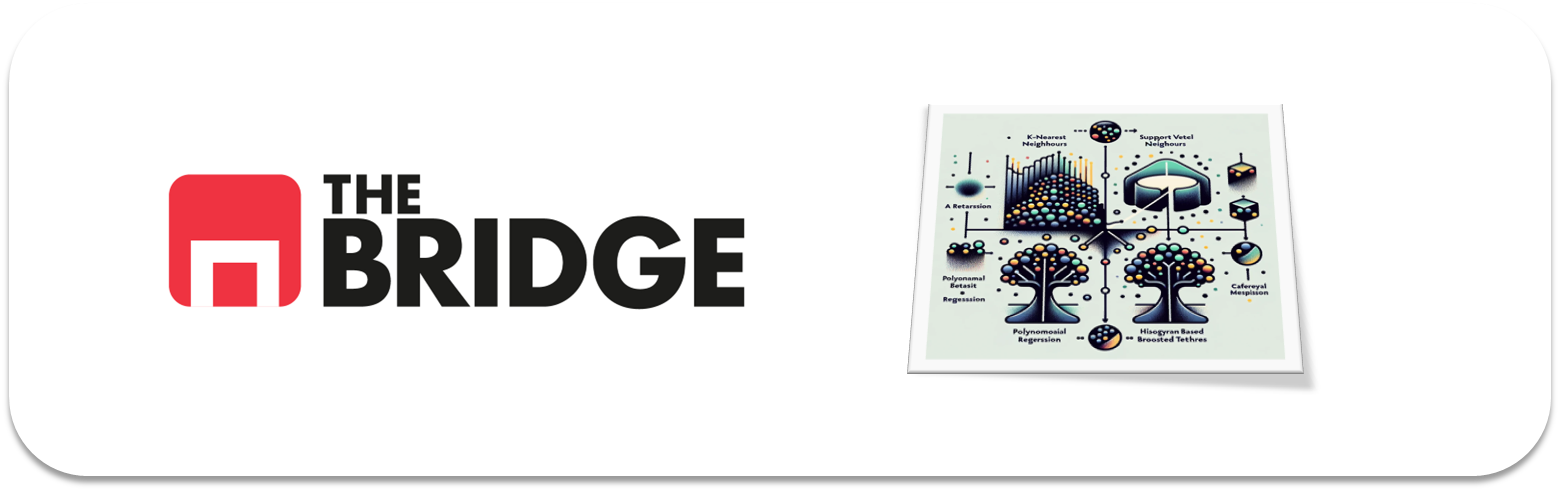

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bootcampviztools as bt

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix, make_scorer, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv("./data/credit_npo.csv")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      12537 non-null  category
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64 
 2   age                                   12537 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64   
 4   DebtRatio                             12537 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64   
 7   NumberOfTimes90DaysLate               12537 non-null  int64   
 8   NumberRealEstateLoansOrLines          12537 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64   
 10  NumberOfDependents                    12360 non-null  float64 
dtypes:

1. **SeriousDlqin2yrs**: Variable entera que indica si un individuo experimentó morosidad grave en los últimos 2 años.

2. **RevolvingUtilizationOfUnsecuredLines**: Variable decimal que representa la proporción del saldo total pendiente en tarjetas de crédito con respecto a la suma de los límites de crédito.

3. **Age**: Variable entera que indica la edad de los individuos.

4. **NumberOfTime30-59DaysPastDueNotWorse**: Variable entera que indica el número de veces que un individuo ha estado en mora de 30 a 59 días en los últimos periodos.

5. **DebtRatio**: Variable decimal que representa la proporción de deuda respecto al ingreso total.

6. **MonthlyIncome**: Variable decimal que indica los ingresos mensuales.

7. **NumberOfOpenCreditLinesAndLoans**: Variable entera que indica el número de líneas de crédito y préstamos abiertos.

8. **NumberOfTimes90DaysLate**: Variable entera que indica el número de veces que un individuo ha estado en mora de 90 días o más.

9. **NumberRealEstateLoansOrLines**: Variable entera que indica el número de préstamos o líneas de crédito respaldados por bienes raíces.

10. **NumberOfTime60-89DaysPastDueNotWorse**: Variable entera que indica el número de veces que un individuo ha estado en mora de 60 a 89 días en los últimos periodos.

11. **NumberOfDependents**: Variable decimal que indica el número de dependientes.


In [5]:
target = 'SeriousDlqin2yrs'

In [6]:
df.SeriousDlqin2yrs.value_counts()

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

In [8]:
df['SeriousDlqin2yrs'] = df['SeriousDlqin2yrs'].astype('category')

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

La variable target es *SeriousDlqin2yrs*.  
Se trataría de un problema supervisado de clasificación binaria

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [12]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

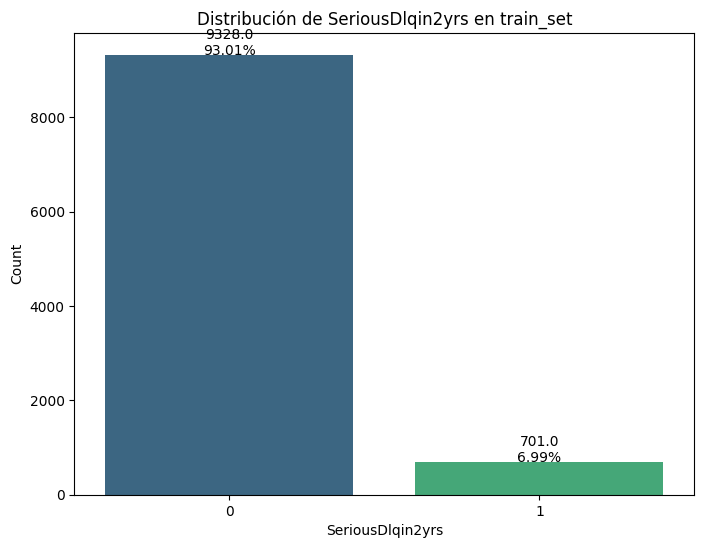

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SeriousDlqin2yrs', hue='SeriousDlqin2yrs', data=train_set, palette='viridis', legend=False)

# Etiquetas y título
plt.title('Distribución de SeriousDlqin2yrs en train_set')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Count')

# Mostrar valores absolutos y porcentajes en las barras
total = len(train_set)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5,
            f'{height}\n{height/total:.2%}', ha="center")

plt.show()

In [17]:
train_set.SeriousDlqin2yrs.value_counts()

SeriousDlqin2yrs
0    9328
1     701
Name: count, dtype: int64

In [18]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10029 entries, 5441 to 7270
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      10029 non-null  category
 1   RevolvingUtilizationOfUnsecuredLines  10029 non-null  float64 
 2   age                                   10029 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  10029 non-null  int64   
 4   DebtRatio                             10029 non-null  float64 
 5   MonthlyIncome                         9458 non-null   float64 
 6   NumberOfOpenCreditLinesAndLoans       10029 non-null  int64   
 7   NumberOfTimes90DaysLate               10029 non-null  int64   
 8   NumberRealEstateLoansOrLines          10029 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  10029 non-null  int64   
 10  NumberOfDependents                    9889 non-null   float64 
dtypes: ca

In [20]:
features_num = [col for col in train_set.columns if col not in target]
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

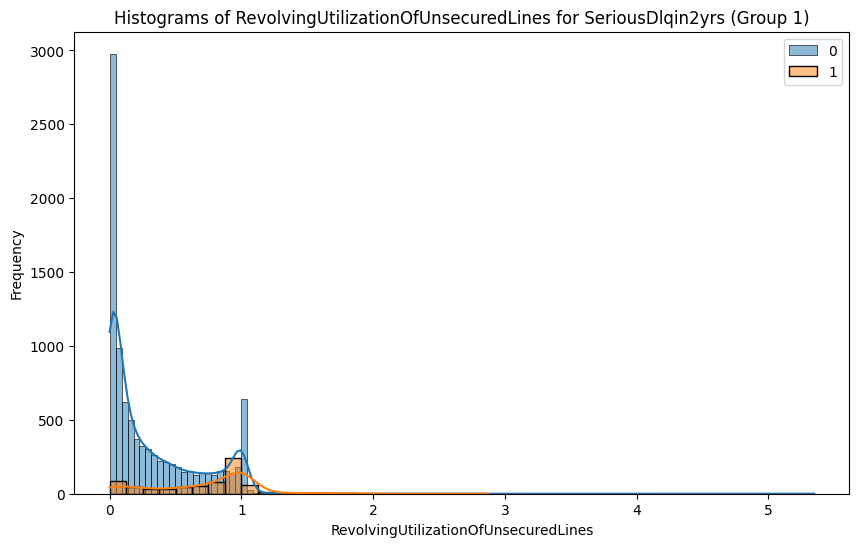

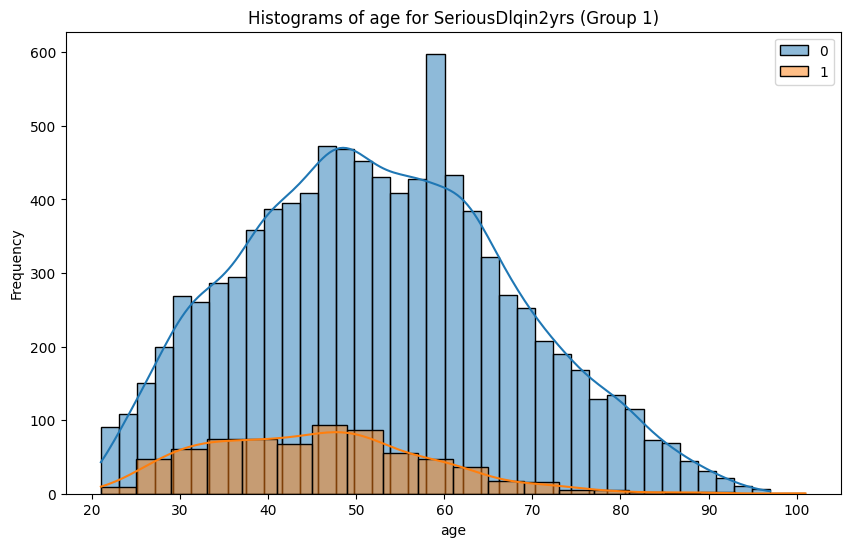

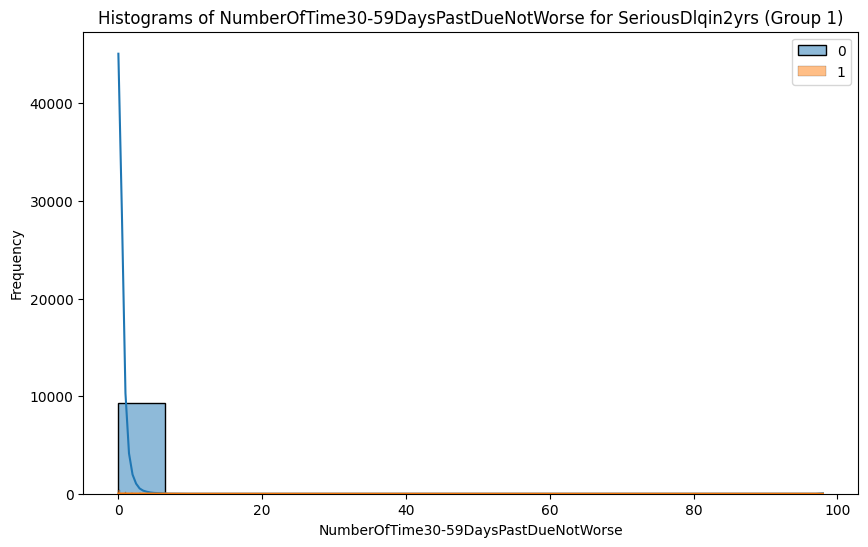

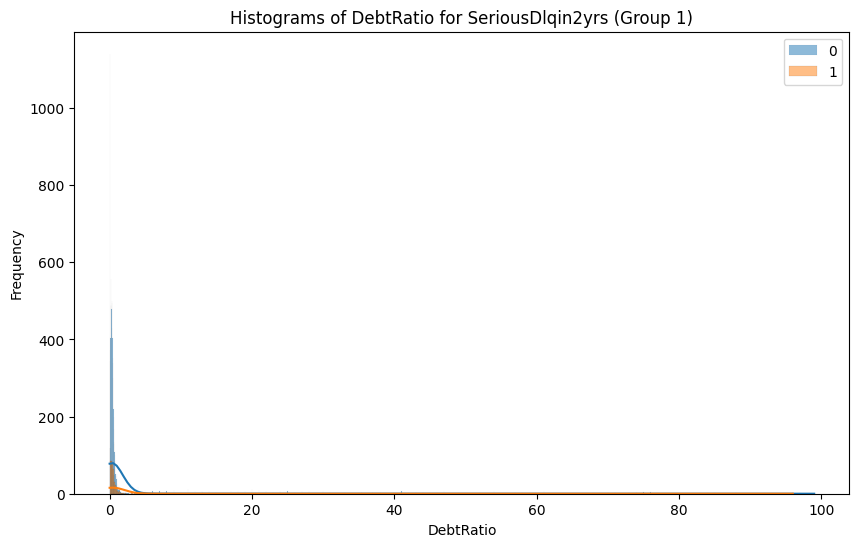

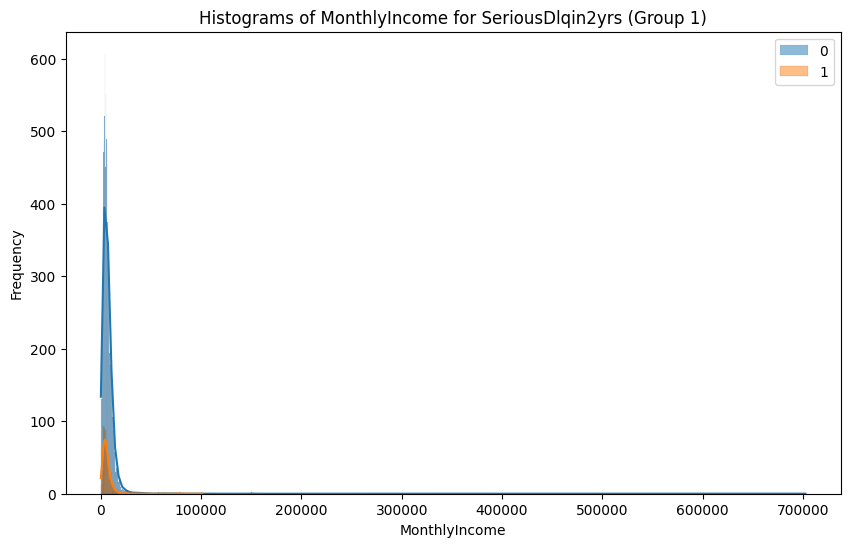

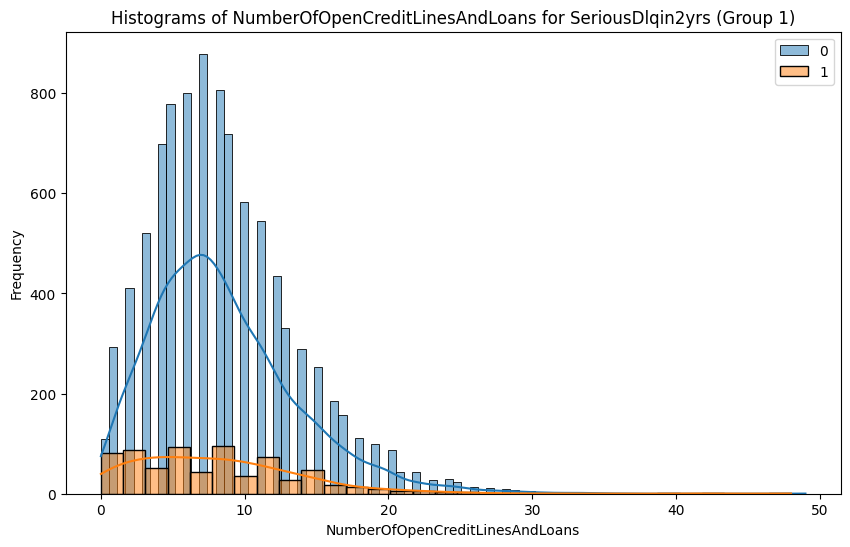

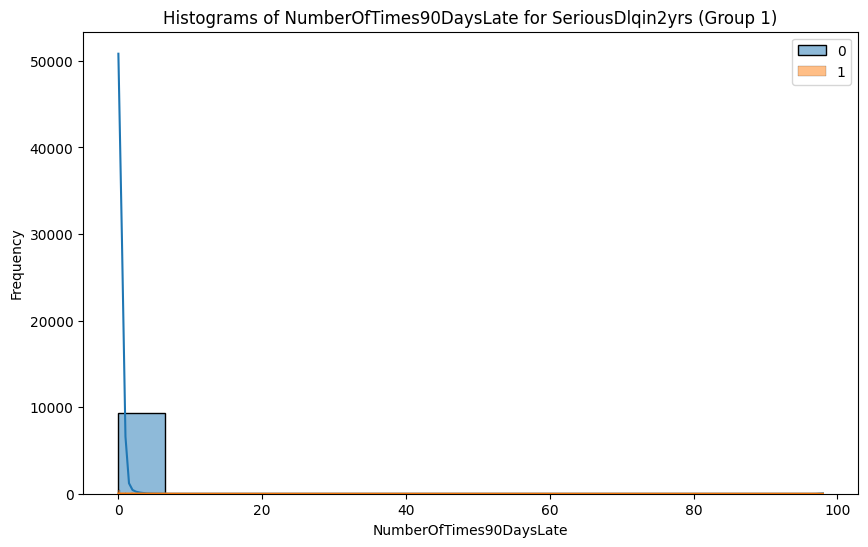

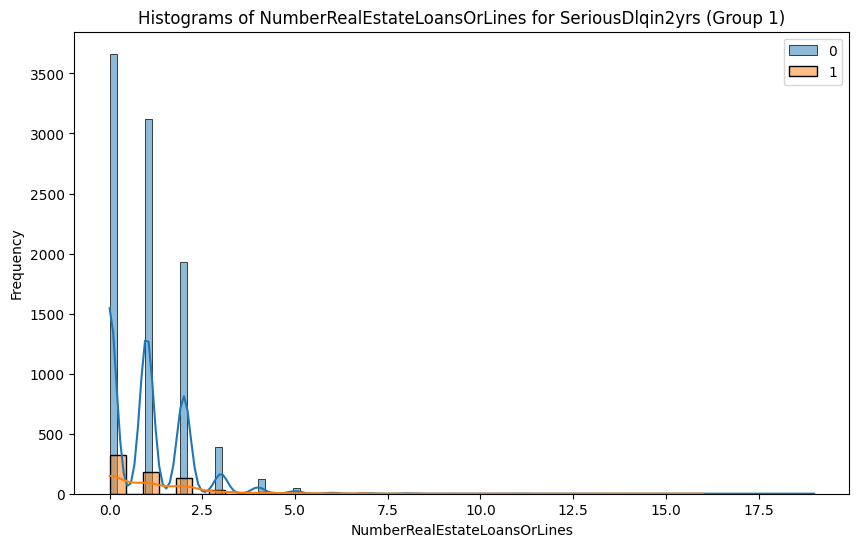

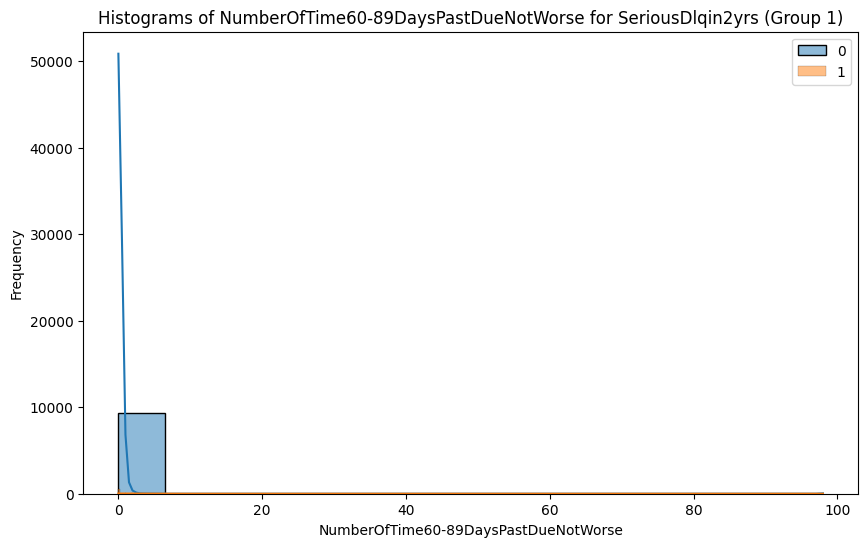

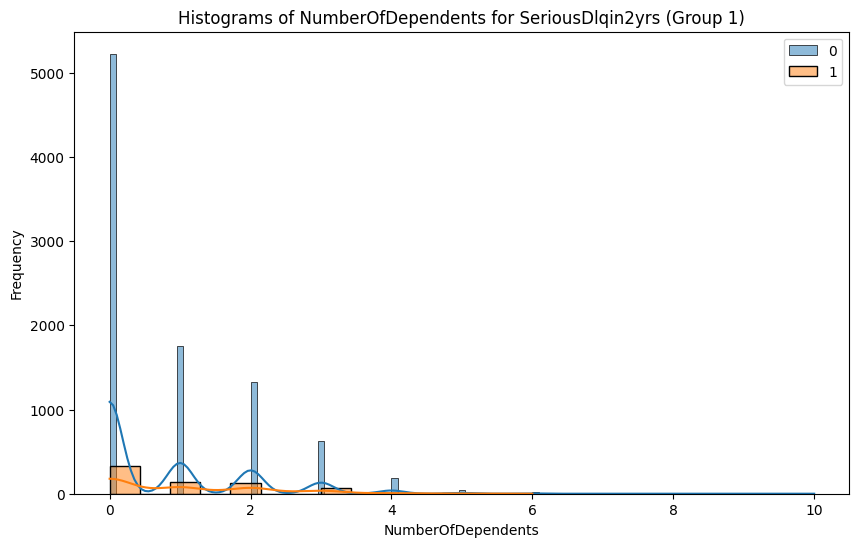

In [24]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col=target, num_col= col, group_size= 2)

In [27]:
# Crear un imputador
imputer = SimpleImputer(strategy='mean')

# Imputar valores nulos en el conjunto de entrenamiento
X_resampled_imputed = imputer.fit_transform(train_set)

# Imputar valores nulos en el conjunto de prueba
X_test_imputed = imputer.transform(test_set)

In [30]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Manejar valores nulos en X mediante imputación
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para el manejo del desequilibrio en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [31]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    # Agrega otros modelos si lo deseas
}

# Evaluar modelos utilizando validación cruzada (Recall como métrica)
scorer = make_scorer(recall_score)
for name, model in models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring=scorer)
    print(f'{name} - Recall: {scores.mean():.4f} (std: {scores.std():.4f})')


Random Forest - Recall: 0.9389 (std: 0.1021)
KNN - Recall: 0.8973 (std: 0.0046)


In [32]:
# Ajustar hiperparámetros para el modelo Random Forest (ejemplo)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5, scoring=scorer)
rf_grid.fit(X_resampled, y_resampled)

# Mejores hiperparámetros
best_rf_params = rf_grid.best_params_
print(f'Mejores hiperparámetros para Random Forest: {best_rf_params}')


Mejores hiperparámetros para Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [33]:
# Evaluar el modelo seleccionado en el conjunto de prueba
best_model = rf_grid.best_estimator_
y_pred = best_model.predict(X_test)

# Imprimir métricas de clasificación
print('\nReporte de Clasificación en Conjunto de Prueba:')
print(classification_report(y_test, y_pred))

# Imprimir matriz de confusión
print('\nMatriz de Confusión en Conjunto de Prueba:')
print(confusion_matrix(y_test, y_pred))



Reporte de Clasificación en Conjunto de Prueba:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2345
           1       0.46      0.36      0.40       163

    accuracy                           0.93      2508
   macro avg       0.71      0.66      0.68      2508
weighted avg       0.92      0.93      0.93      2508


Matriz de Confusión en Conjunto de Prueba:
[[2277   68]
 [ 105   58]]
